# PyTorch Neural Network Classification notebook

In [768]:
# Import necessary libraries
import torch
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import copy

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from torch import nn

from plotDecisionBoundary import plot_decision_boundary

In [737]:
# set device agnostic code
device = "cuda" if torch.cuda.is_available() else "CPU"
torch.__version__, device

('2.4.1+cu124', 'cuda')

## 1. Making claassification data and get it ready

Note: using toy dataset make_circles

In [738]:
# make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)
print(f"First 5 samples of X:\n {X[:5]}\n")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 samples of y:
 [1 1 1 1 0]


In [739]:
# Make dataframe for visualization
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y[0]})
circles.head(10)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,1
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,1


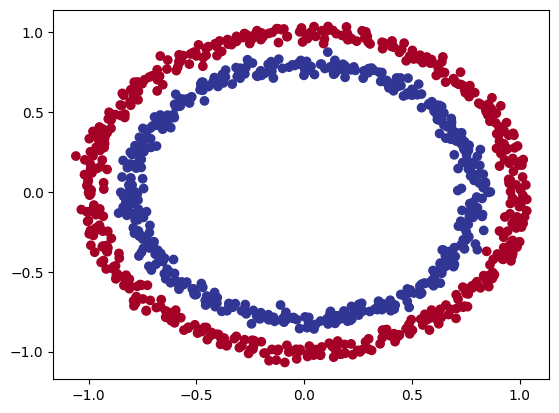

In [740]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

### 1.1 Check input and output shape

In [741]:
X.shape, y.shape

((1000, 2), (1000,))

In [742]:
# View the first example of features and labels
print(f"Values of first sample of X: {X[0]} | corresponding value of y: {y[0]}")
print(f"Shape of first sample of X: {X[0].shape} | shape of corresponding y: {y[0].shape}")

Values of first sample of X: [0.75424625 0.23148074] | corresponding value of y: 1
Shape of first sample of X: (2,) | shape of corresponding y: ()


### 1.2 Turn data into tensors and create train test split

In [743]:
torch.__version__

'2.4.1+cu124'

In [744]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X, y

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         ...,
         [-0.1369, -0.8100],
         [ 0.6704, -0.7675],
         [ 0.2811,  0.9638]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
         1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
         0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
         1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
         0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
         0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
         1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,


In [745]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [746]:
# split data into test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, train_size=0.8, shuffle=True, random_state=42
)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

In [747]:
class CirclesClassificationModelV0(torch.nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
        self.layer_01 = torch.nn.Linear(in_features=2, out_features=5)
        self.layer_02 = torch.nn.Linear(in_features=5, out_features=1)
        
        
    def forward(self, x):
        return self.layer_02(self.layer_01(x))
    
    
model_00 = CirclesClassificationModelV0().to(device)
model_00, device, next(model_00.parameters()).device

(CirclesClassificationModelV0(
   (layer_01): Linear(in_features=2, out_features=5, bias=True)
   (layer_02): Linear(in_features=5, out_features=1, bias=True)
 ),
 'cuda',
 device(type='cuda', index=0))

In [748]:
## nn.Sequential version

model_01 = torch.nn.Sequential(
    torch.nn.Linear(in_features=2, out_features=5),
    torch.nn.Linear(in_features=5, out_features=16),
    torch.nn.Linear(in_features=16, out_features=5),
    torch.nn.Linear(in_features=5, out_features=1)
).to(device)

model_01, device, next(model_01.parameters()).device

(Sequential(
   (0): Linear(in_features=2, out_features=5, bias=True)
   (1): Linear(in_features=5, out_features=16, bias=True)
   (2): Linear(in_features=16, out_features=5, bias=True)
   (3): Linear(in_features=5, out_features=1, bias=True)
 ),
 'cuda',
 device(type='cuda', index=0))

In [749]:
model_01.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202],
                      [-0.1213,  0.1882,  0.3993,  0.2585, -0.1955],
                      [ 0.2582,  0.0800,  0.2271, -0.2726, -0.4427],
                      [-0.1728, -0.3430,  0.3670,  0.1288,  0.1852],
                      [ 0.1414, -0.0078,  0.3500, -0.3178,  0.0282],
                      [-0.3052,  0.1379, -0.1540,  0.1370, -0.0932],
                      [ 0.3709, -0.2651, -0.2667, -0.2667,  0.4022],
                      [ 0.1490,  0.4303, -0.3691, -0.4436, -0.3499],
                      [-0.3008,  0.1811,  0.1601,  0.37

### 2.1 Picking a loss function and optimizer

* For regression you might want MAE or MSE (mean absolyte error or mean square error)
* For classification you want binary cross entropy or categorical cross entropy
* Most common optimizers are SGD and ADAM

In [750]:
# loss_fn = torch.nn.BCELoss                # Requires a Sigmoid Activation function prior    
loss_fn = torch.nn.BCEWithLogitsLoss()      # Has sigmoid activation function build in
optimizer = torch.optim.SGD(params=model_00.parameters(), lr = 0.01)

In [751]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

## 3. Train model

Outputs of this model are going to be raw **logits**

**logits** need to be converted into **prediction propabilities** by passing them to some king of activation function (eg. sigmoid or softmax)

Then propabilities can be converted to **prediction labels** by either rounding them or taking the 'argmax()'.

In [752]:
# viewing some logits
model_00.eval()
with torch.inference_mode():
    y_logits = model_00(X_train.to(device))
y_logits[:5]


tensor([[-0.1420],
        [-0.1567],
        [-0.1939],
        [-0.1973],
        [-0.1124]], device='cuda:0')

In [753]:
# Use sigmoid activation function on logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_labels= torch.round(y_pred_probs)
print(y_pred_probs[:5], "\n", y_pred_labels[:5])


tensor([[0.4646],
        [0.4609],
        [0.4517],
        [0.4508],
        [0.4719]], device='cuda:0') 
 tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')


In [754]:
X_train, X_test, y_train, y_test = (
    X_train.to(device),
    X_test.to(device),
    y_train.to(device).unsqueeze(1),
    y_test.to(device).unsqueeze(1),
)

In [755]:
# training loop
torch.cuda.manual_seed(42)
epochs = 300
trained_model = model_00

for epoch in range(epochs):

    # training
    trained_model.train()
    logits = trained_model(X_train)
    predictions = torch.round(torch.sigmoid(logits))
    loss = loss_fn(logits, y_train)
    acc = accuracy_fn(y_train, predictions)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # testing
    trained_model.eval()
    with torch.inference_mode():
        if epoch % 10 == 0:
            test_logits = trained_model(X_test)
            test_preds = torch.round(torch.sigmoid(test_logits))
            test_accuracy = accuracy_fn(y_test, test_preds)
            test_loss = loss_fn(test_logits, y_test)
            print(
                f"Epoch: {epoch} | Loss: {loss} | Testing Loss: {test_loss} | Accuracy: {acc} | Test accuracy: {test_accuracy}"
            )

Epoch: 0 | Loss: 0.6956853866577148 | Testing Loss: 0.697385311126709 | Accuracy: 50.0 | Test accuracy: 50.0
Epoch: 10 | Loss: 0.6954386830329895 | Testing Loss: 0.6971977949142456 | Accuracy: 50.0 | Test accuracy: 50.0
Epoch: 20 | Loss: 0.6952154636383057 | Testing Loss: 0.697030782699585 | Accuracy: 50.0 | Test accuracy: 50.0
Epoch: 30 | Loss: 0.6950134634971619 | Testing Loss: 0.6968820691108704 | Accuracy: 50.0 | Test accuracy: 50.0
Epoch: 40 | Loss: 0.6948308348655701 | Testing Loss: 0.6967498660087585 | Accuracy: 50.0 | Test accuracy: 50.0
Epoch: 50 | Loss: 0.6946654915809631 | Testing Loss: 0.696632444858551 | Accuracy: 50.0 | Test accuracy: 50.0
Epoch: 60 | Loss: 0.6945160627365112 | Testing Loss: 0.6965281367301941 | Accuracy: 50.0 | Test accuracy: 50.0
Epoch: 70 | Loss: 0.6943807601928711 | Testing Loss: 0.6964356303215027 | Accuracy: 50.0 | Test accuracy: 50.0
Epoch: 80 | Loss: 0.6942583322525024 | Testing Loss: 0.6963536143302917 | Accuracy: 50.0 | Test accuracy: 50.0
Epoch

## 4. Predictions and visualization

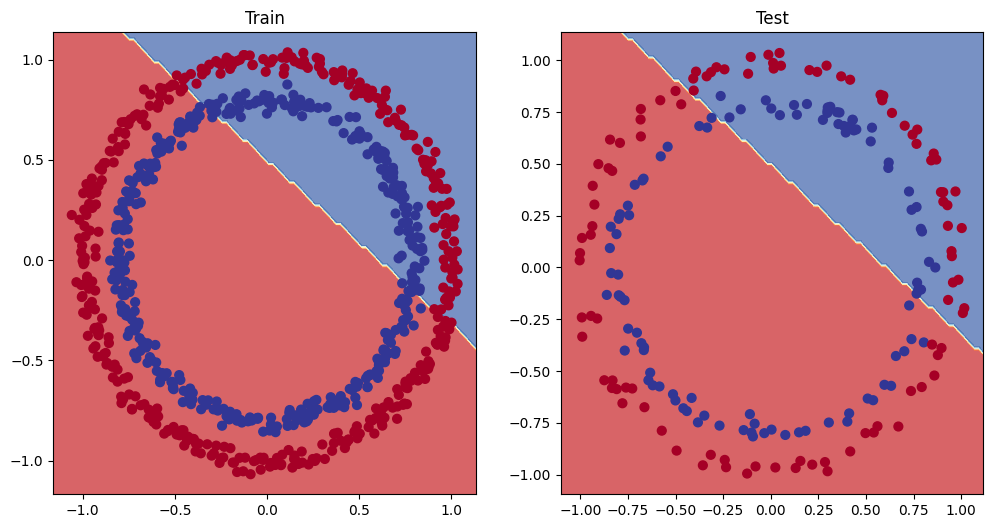

In [756]:

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(trained_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(trained_model, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers
* Add more hidden units
* Fit for longer
* Change the activation function
* Change the learning rate
* Change the loss function

The above options are called **hyperparameters**, because they can be changed by the engineer.

In [757]:
class CirclesClassificationModelV1(torch.nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.layer_00 = torch.nn.Linear(in_features=2, out_features=16)
        self.layer_01 = torch.nn.Linear(in_features=16, out_features=16)
        self.layer_02 = torch.nn.Linear(in_features=16, out_features=1)

    def forward(self, x):
        # z= self.layer_input(x)
        # z = self.layer_hidden_01(z)
        # z = self.layer_output(z)
        # return z

        return self.layer_02(self.layer_01(self.layer_00(x)))
    
model_02 = CirclesClassificationModelV1()
model_02

CirclesClassificationModelV1(
  (layer_00): Linear(in_features=2, out_features=16, bias=True)
  (layer_01): Linear(in_features=16, out_features=16, bias=True)
  (layer_02): Linear(in_features=16, out_features=1, bias=True)
)

In [758]:
# loss_fn = torch.nn.BCELoss                    # Requires a Sigmoid Activation function prior    
loss_fn_01 = torch.nn.BCEWithLogitsLoss()       # Has sigmoid activation function build in
optimizer_01 = torch.optim.SGD(params=model_02.parameters(), lr = 0.01)

In [759]:
X_train, X_test, y_train, y_test = (
    X_train.to(device).squeeze(),
    X_test.to(device).squeeze(),
    y_train.to(device).squeeze(),
    y_test.to(device).squeeze(),
)


torch.cuda.manual_seed(42)
epochs = 300
trained_model = model_02.to(device)

for epoch in range(epochs):

    # training
    trained_model.train()
    logits = trained_model(X_train).squeeze()
    predictions = torch.round(torch.sigmoid(logits))
    loss = loss_fn_01(logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=predictions)
    optimizer_01.zero_grad()
    loss.backward()
    optimizer.step()

    # testing
    trained_model.eval()
    with torch.inference_mode():
        if epoch % 10 == 0:
            test_logits = trained_model(X_test).squeeze()
            test_preds = torch.round(torch.sigmoid(test_logits))
            test_accuracy = accuracy_fn(y_test, test_preds)
            test_loss = loss_fn_01(test_logits, y_test)
            print(
                f"Epoch: {epoch} | Loss: {loss} | Testing Loss: {test_loss} | Accuracy: {acc} | Test accuracy: {test_accuracy}"
            )

Epoch: 0 | Loss: 0.6975535154342651 | Testing Loss: 0.7002605199813843 | Accuracy: 53.75 | Test accuracy: 52.5
Epoch: 10 | Loss: 0.6975535154342651 | Testing Loss: 0.7002605199813843 | Accuracy: 53.75 | Test accuracy: 52.5
Epoch: 20 | Loss: 0.6975535154342651 | Testing Loss: 0.7002605199813843 | Accuracy: 53.75 | Test accuracy: 52.5
Epoch: 30 | Loss: 0.6975535154342651 | Testing Loss: 0.7002605199813843 | Accuracy: 53.75 | Test accuracy: 52.5
Epoch: 40 | Loss: 0.6975535154342651 | Testing Loss: 0.7002605199813843 | Accuracy: 53.75 | Test accuracy: 52.5
Epoch: 50 | Loss: 0.6975535154342651 | Testing Loss: 0.7002605199813843 | Accuracy: 53.75 | Test accuracy: 52.5
Epoch: 60 | Loss: 0.6975535154342651 | Testing Loss: 0.7002605199813843 | Accuracy: 53.75 | Test accuracy: 52.5
Epoch: 70 | Loss: 0.6975535154342651 | Testing Loss: 0.7002605199813843 | Accuracy: 53.75 | Test accuracy: 52.5
Epoch: 80 | Loss: 0.6975535154342651 | Testing Loss: 0.7002605199813843 | Accuracy: 53.75 | Test accuracy

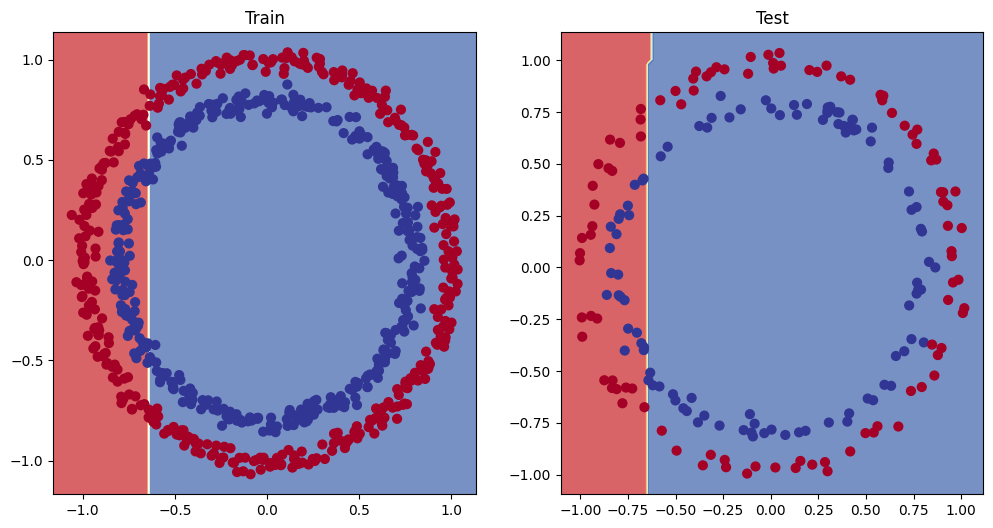

In [760]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(trained_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(trained_model, X_test, y_test)

# 6. The missing piece: non-linearity

### 6.1 Data preparation

In [761]:
# prepare data and functions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, train_size=0.8, shuffle=True, random_state=42
)

X_train[:5], X_test[:5], y_train[:5], y_test[:5] 

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438]]),
 tensor([1., 0., 0., 0., 1.]),
 tensor([1., 0., 1., 0., 1.]))

In [762]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

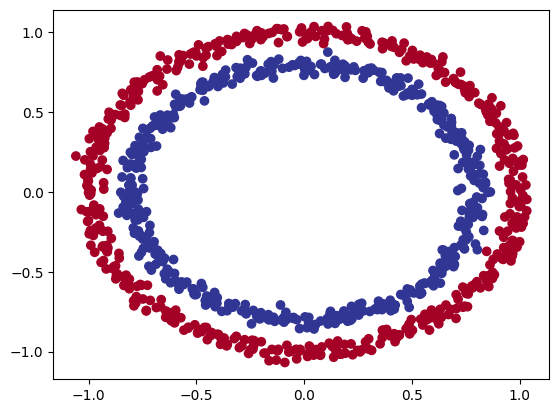

In [763]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

### 6.1 Model with nonlinearity

In [764]:
class CirclesClassificationModelV2(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.layer_00 = nn.Linear(in_features=2, out_features=16)
        self.layer_01 = nn.Linear(in_features=16, out_features=16)
        self.layer_02 = nn.Linear(in_features=16, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_02(self.relu(self.layer_01(self.relu(self.layer_00(x)))))


model_03 = CirclesClassificationModelV2().to(device)
model_03

CirclesClassificationModelV2(
  (layer_00): Linear(in_features=2, out_features=16, bias=True)
  (layer_01): Linear(in_features=16, out_features=16, bias=True)
  (layer_02): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

### 6.2 Training code

In [765]:
X_train, X_test, y_train, y_test = (
    X_train.to(device),
    X_test.to(device),
    y_train.to(device),
    y_test.to(device),
)
model_03.to(device)


loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_03.parameters(), lr=0.01)

torch.cuda.manual_seed(42)
torch.manual_seed(42)
epochs = 15001

for epoch in range(epochs):

    # training
    model_03.train()
    logits = model_03(X_train).squeeze()
    predictions = torch.round(torch.sigmoid(logits))
    loss = loss_fn(logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=predictions)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # testing
    model_03.eval()
    with torch.inference_mode():
        if epoch % 10 == 0:
            test_logits = model_03(X_test).squeeze()
            test_preds = torch.round(torch.sigmoid(test_logits))
            test_accuracy = accuracy_fn(y_test, test_preds)
            test_loss = loss_fn(test_logits, y_test)
            print(
                f"Epoch: {epoch} | Loss: {loss} | Testing Loss: {test_loss} | Accuracy: {acc} | Test accuracy: {test_accuracy}"
            )

Epoch: 0 | Loss: 0.6945104598999023 | Testing Loss: 0.6950036287307739 | Accuracy: 50.0 | Test accuracy: 50.0
Epoch: 10 | Loss: 0.6943561434745789 | Testing Loss: 0.6948765516281128 | Accuracy: 50.0 | Test accuracy: 50.0
Epoch: 20 | Loss: 0.6942019462585449 | Testing Loss: 0.6947536468505859 | Accuracy: 50.0 | Test accuracy: 50.0
Epoch: 30 | Loss: 0.694047749042511 | Testing Loss: 0.6946330070495605 | Accuracy: 50.0 | Test accuracy: 50.0
Epoch: 40 | Loss: 0.693897545337677 | Testing Loss: 0.6945157647132874 | Accuracy: 50.0 | Test accuracy: 50.0
Epoch: 50 | Loss: 0.6937537789344788 | Testing Loss: 0.6944004893302917 | Accuracy: 50.0 | Test accuracy: 50.0
Epoch: 60 | Loss: 0.6936131715774536 | Testing Loss: 0.6942859292030334 | Accuracy: 50.0 | Test accuracy: 50.0
Epoch: 70 | Loss: 0.6934788823127747 | Testing Loss: 0.6941725015640259 | Accuracy: 50.0 | Test accuracy: 50.0
Epoch: 80 | Loss: 0.6933509707450867 | Testing Loss: 0.6940628886222839 | Accuracy: 50.0 | Test accuracy: 50.0
Epoc

### 6.3 Evaluation

In [766]:
model_03.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_03(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

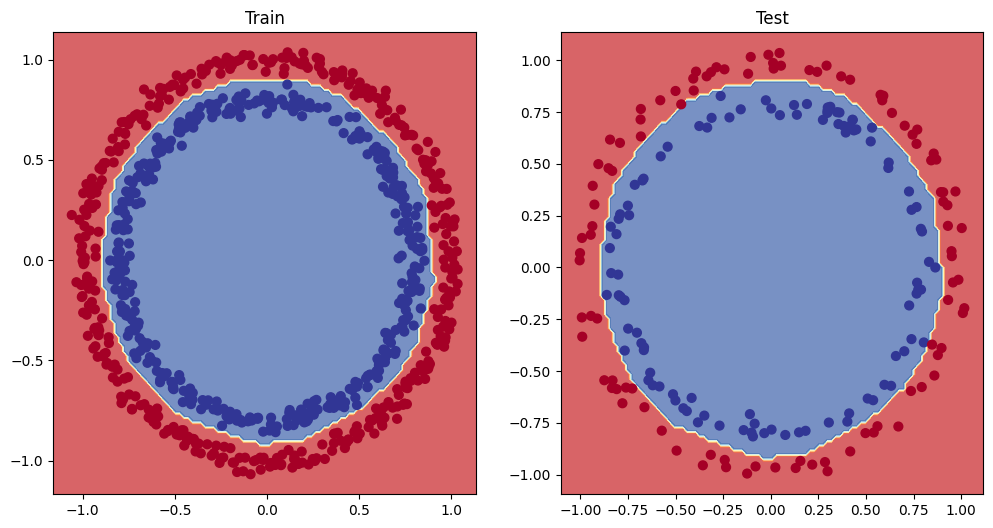

In [769]:
model_03_copy = copy.deepcopy(model_03)
X_train_copy = copy.deepcopy(X_train)
y_train_copy = copy.deepcopy(y_train)
X_test_copy = copy.deepcopy(X_test)
y_test_copy = copy.deepcopy(y_test)

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_03_copy, X_train_copy, y_train_copy)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_03_copy, X_test_copy, y_test_copy)

# Replicating non-linear activation functions

In [770]:
A = torch.arange(-10, 10, 1, dtype=float)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.], dtype=torch.float64)

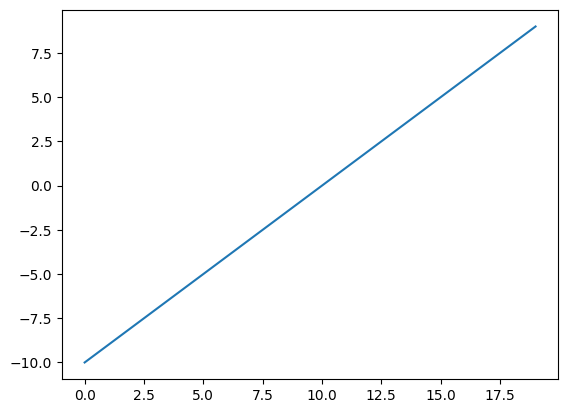

In [772]:
# Visualize
plt.plot(A)

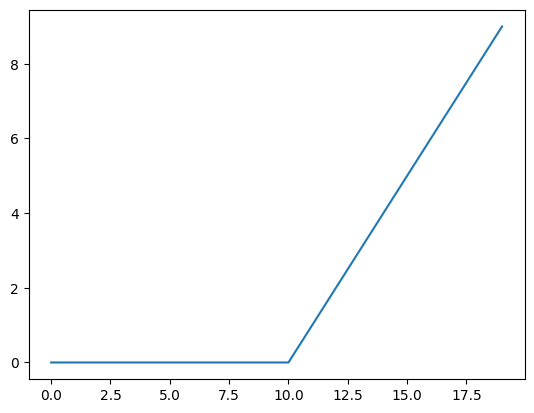

In [773]:
plt.plot(torch.relu(A))

In [775]:
def relu(x : torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.], dtype=torch.float64)

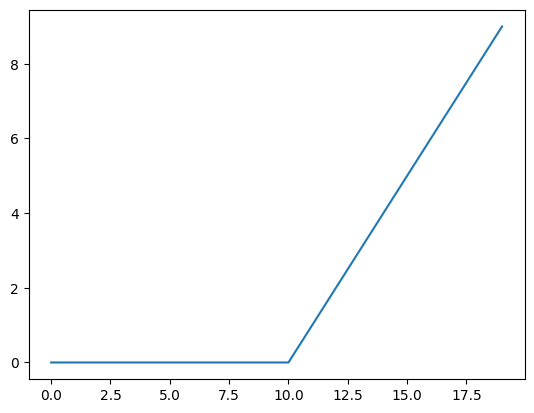

In [776]:
# plot relu custom function
plt.plot(relu(A))

In [777]:
def sigmoid(x :torch.Tensor)->torch.Tensor:
    return 1 / (1 + torch.exp(-x))

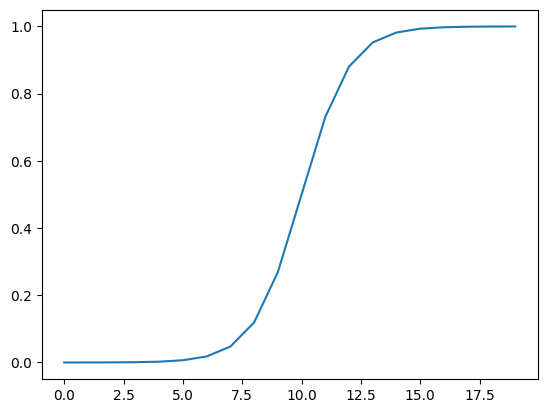

In [779]:
plt.plot(sigmoid(A))